IMPORTING THE NECESSARY LIBRARIES

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

DATA OVERVIEW

In [77]:
df = pd.read_csv('/content/drive/MyDrive/G-IHUB/HEALTH MANIA/Sleep_Stress data.csv')

In [78]:
df.isnull().sum()

,0
Unnamed: 0,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0


In [79]:

df['Sleep Disorder'].fillna('No Disorder', inplace=True)


<ipython-input-79-c370f142f550>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('No Disorder', inplace=True)


In [80]:
df.head()

,Unnamed: 0,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0,1,Male,0,Software Engineer,6.1,2,4,3,Overweight,126/83,10,6,No Disorder
1,1,2,Male,1,Doctor,6.2,2,9,5,Normal,125/80,8,19,No Disorder
2,2,3,Male,1,Doctor,6.2,2,9,5,Normal,125/80,8,19,No Disorder
3,3,4,Male,1,Sales Representative,5.9,0,0,5,Obese,140/90,17,0,Sleep Apnea
4,4,5,Male,1,Sales Representative,5.9,0,0,5,Obese,140/90,17,0,Sleep Apnea


In [81]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,736
Overweight,538
Normal Weight,67
Obese,33


In [82]:
df['Stress Level'].value_counts()

,count
Stress Level,
0,280
5,252
2,244
1,242
4,182
3,174


In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
No Disorder,816
Sleep Apnea,287
Insomnia,271


In [ ]:
df['Occupation'].value_counts()

,count
Occupation,
Doctor,265
Nurse,260
Engineer,250
Lawyer,166
Teacher,146
Accountant,122
Salesperson,118
Scientist,20
Software Engineer,16


DATA PREPROCESSING

In [83]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Occupation'] = df['Occupation'].map({'Accountant': 1, 'Doctor': 2, 'Engineer': 3, 'Lawyer': 4, 'Manager': 5, 'Nurse':6,  'Salesperson': 7, 'Sales Representative': 8,
                                         'Scientist': 9,'Software Engineer':10, 'Teacher': 11})
df['BMI Category'] = df['BMI Category'].map({'Underweight': 0, 'Normal Weight': 1, 'Normal': 1,  'Overweight': 2, 'Obese': 3})
df['Sleep Disorder'] = df['Sleep Disorder'].map({'No Disorder': 0, 'Insomnia': 1, 'Sleep Apnea': 2})

In [84]:
df.head()

,Unnamed: 0,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0,1,1,0,10,6.1,2,4,3,2,126/83,10,6,0
1,1,2,1,1,2,6.2,2,9,5,1,125/80,8,19,0
2,2,3,1,1,2,6.2,2,9,5,1,125/80,8,19,0
3,3,4,1,1,8,5.9,0,0,5,3,140/90,17,0,2
4,4,5,1,1,8,5.9,0,0,5,3,140/90,17,0,2


In [85]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1pkbXfwM_wlmaUrfEP28aPAOrgYP-TgpemEbPxwsAb_0#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [86]:
#splitting the blodd pressure to create new columns
df[['SystolicBP', 'DiastolicBP']] = df['Blood Pressure'].apply(lambda x: pd.Series(str(x).split('/')))
df.drop(columns=['Blood Pressure'], inplace=True)
df.head()


,Unnamed: 0,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SystolicBP,DiastolicBP
0,0,1,1,0,10,6.1,2,4,3,2,10,6,0,126,83
1,1,2,1,1,2,6.2,2,9,5,1,8,19,0,125,80
2,2,3,1,1,2,6.2,2,9,5,1,8,19,0,125,80
3,3,4,1,1,8,5.9,0,0,5,3,17,0,2,140,90
4,4,5,1,1,8,5.9,0,0,5,3,17,0,2,140,90


In [87]:
df.dtypes

,0
Unnamed: 0,int64
Person ID,int64
Gender,int64
Age,int64
Occupation,int64
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,int64


In [88]:
df.SystolicBP = df.SystolicBP.astype('int')

df.DiastolicBP = df.DiastolicBP.astype('int')

In [89]:
df.columns

Index(['Unnamed: 0', 'Person ID', 'Gender', 'Age', 'Occupation',
       'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'SystolicBP', 'DiastolicBP'],
      dtype='object')

SPLITTING THE DATASET INTO TRAIN, VALIDATION AND TEST DATASET

In [90]:

X = df.drop(columns=['Unnamed: 0','Person ID', 'Stress Level', 'Sleep Disorder'])

y = df[['Stress Level', 'Sleep Disorder']]

# Split the data into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting data sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


X_train shape: (961, 11)
y_train shape: (961, 2)
X_val shape: (206, 11)
y_val shape: (206, 2)
X_test shape: (207, 11)
y_test shape: (207, 2)


In [ ]:
X_train[:5]

array([[ 0.99274226,  0.16799423, -0.58292403,  0.65004415,  0.54423299,
         1.33620954, -0.78825607,  0.02449339,  0.97361689,  0.20172842,
         0.08059244],
       [-1.0073108 ,  0.80359443,  0.42946752, -1.42077248, -1.10044596,
         1.33620954,  1.06839609,  1.18687106,  1.19217466,  1.54332714,
         1.75336421],
       [ 0.99274226,  0.04087419, -0.24546018,  0.80559552,  0.54423299,
         1.33620954, -0.78825607,  0.02449339,  0.97361689,  0.20172842,
         0.08059244],
       [ 0.99274226, -0.08624586, -0.24546018,  0.57191368,  0.54423299,
         1.33620954, -0.78825607,  0.02449339,  0.97361689,  0.20172842,
         0.08059244],
       [ 0.99274226, -1.10320618, -0.92038788, -1.45106648, -1.10044596,
        -1.49095331, -0.78825607,  0.31508781, -1.21196085, -0.46907094,
        -0.75579345]])

In [ ]:
y_train['Stress Level'].value_counts()

,count
Stress Level,
0,197
2,183
5,172
1,162
4,128
3,119


In [ ]:
y_train['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
0,576
1,195
2,190


Multi-Output SVM Classifier - [MODEL BUILDING]

In [123]:
from sklearn.model_selection import GridSearchCV

# Define the multi-output SVM classifier
multi_output_svm = MultiOutputClassifier(SVC(), n_jobs=-1)

# Define the parameter grid for tuning
param_grid = {
    'estimator__C': [0.1, 1, 10, 100, 1000],                # Regularization parameter
    'estimator__kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'estimator__gamma': ['scale', 'auto', 0.001, 0.01] # Kernel coefficient
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(multi_output_svm, param_grid, cv=2, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Get the best estimator
best_multi_output_svm = grid_search.best_estimator_


# Fit the best estimator on the training data
best_multi_output_svm.fit(X_train, y_train)

# Calculate accuracy on training data
y_pred_train = best_multi_output_svm.predict(X_train)

stress_level_accuracy_train = accuracy_score(y_train['Stress Level'], y_pred_train[:, 0])
sleep_disorder_accuracy_train = accuracy_score(y_train['Sleep Disorder'], y_pred_train[:, 1])

# Predict the stress level and sleep disorder on the validation data
y_pred = best_multi_output_svm.predict(X_val)

stress_level_accuracy_val = accuracy_score(y_val['Stress Level'], y_pred[:, 0])
sleep_disorder_accuracy_val = accuracy_score(y_val['Sleep Disorder'], y_pred[:, 1])

print('\n Training data')
print("Stress Level Accuracy for train dataset:", stress_level_accuracy_train * 100)
print("Sleep Disorder Accuracy for train dataset:", sleep_disorder_accuracy_train * 100)

print('\n Validation data')
print("Stress Level Accuracy for validation:", stress_level_accuracy_val * 100)
print("Sleep Disorder Accuracy for validation:", sleep_disorder_accuracy_val * 100)


Fitting 2 folds for each of 60 candidates, totalling 120 fits
Best parameters found:  {'estimator__C': 10, 'estimator__gamma': 'scale', 'estimator__kernel': 'poly'}

 Training data
Stress Level Accuracy for train dataset: 99.79188345473466
Sleep Disorder Accuracy for train dataset: 92.2996878251821

 Validation data
Stress Level Accuracy for validation: 99.51456310679612
Sleep Disorder Accuracy for validation: 96.11650485436894


/Multi-Output XGBoost Classifier - [MODEL BUILDING]

In [109]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

multi_output_xgb= MultiOutputClassifier(estimator=xgb_classifier)

multi_output_xgb.fit(X_train, y_train)


# Calculate accuracy on training data
y_pred_train = multi_output_xgb.predict(X_train)

stress_level_accuracy_train = accuracy_score(y_train['Stress Level'], y_pred_train[:, 0])
sleep_disorder_accuracy_train = accuracy_score(y_train['Sleep Disorder'], y_pred_train[:, 1])



# Predict the stress level and sleep disorder on the validation data
y_pred = multi_output_xgb.predict(X_val)

stress_level_accuracy_val = accuracy_score(y_val['Stress Level'], y_pred[:, 0])
sleep_disorder_accuracy_val = accuracy_score(y_val['Sleep Disorder'], y_pred[:, 1])


print('\n Training data')

print("Stress Level Accuracy for train dataset:", stress_level_accuracy_train*100)
print("Sleep Disorder Accuracy for train dataset:", sleep_disorder_accuracy_train*100)

print('\n Validation data')

print("Stress Level Accuracy for validation:", stress_level_accuracy_val*100)
print("Sleep Disorder Accuracy for validation:", sleep_disorder_accuracy_val*100)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:02:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:02:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Training data
Stress Level Accuracy for train dataset: 100.0
Sleep Disorder Accuracy for train dataset: 95.73361082206036

 Validation data
Stress Level Accuracy for validation: 99.51456310679612
Sleep Disorder Accuracy for validation: 94.1747572815534


Multi-Output Random Forest Classifier - [MODEL BUILDING]

In [113]:
from sklearn.ensemble import RandomForestClassifier
# Create a MultiOutput Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_forest = MultiOutputClassifier(forest)

# Fit the model on the training data
multi_target_forest.fit(X_train, y_train)



# Calculate accuracy on training data
y_pred_train = multi_target_forest.predict(X_train)

stress_level_accuracy_train = accuracy_score(y_train['Stress Level'], y_pred_train[:, 0])
sleep_disorder_accuracy_train = accuracy_score(y_train['Sleep Disorder'], y_pred_train[:, 1])



# Predict the stress level and sleep disorder on the validation data
y_pred = multi_target_forest.predict(X_val)

stress_level_accuracy_val = accuracy_score(y_val['Stress Level'], y_pred[:, 0])
sleep_disorder_accuracy_val = accuracy_score(y_val['Sleep Disorder'], y_pred[:, 1])


print('\n Training data')

print("Stress Level Accuracy for train dataset:", stress_level_accuracy_train*100)
print("Sleep Disorder Accuracy for train dataset:", sleep_disorder_accuracy_train*100)

print('\n Validation data')

print("Stress Level Accuracy for validation:", stress_level_accuracy_val*100)
print("Sleep Disorder Accuracy for validation:", sleep_disorder_accuracy_val*100)


 Training data
Stress Level Accuracy for train dataset: 100.0
Sleep Disorder Accuracy for train dataset: 98.12695109261186

 Validation data
Stress Level Accuracy for validation: 100.0
Sleep Disorder Accuracy for validation: 93.20388349514563


MODEL EVALUATION

SVM performed best

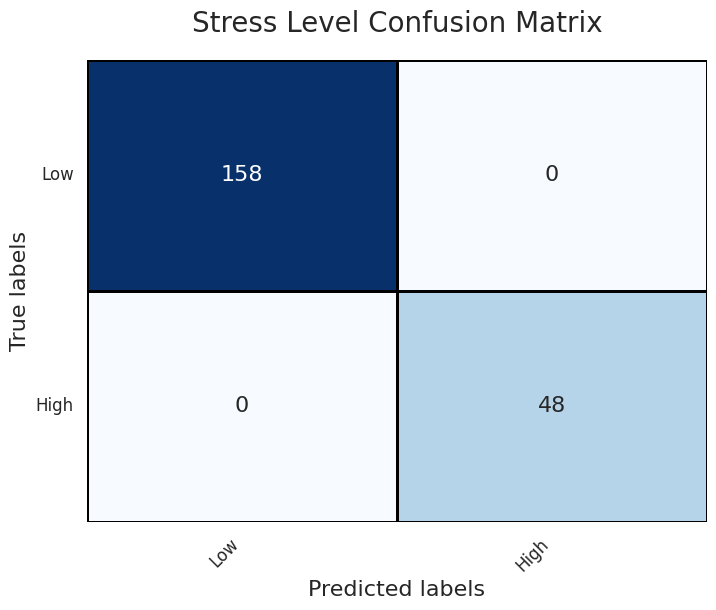

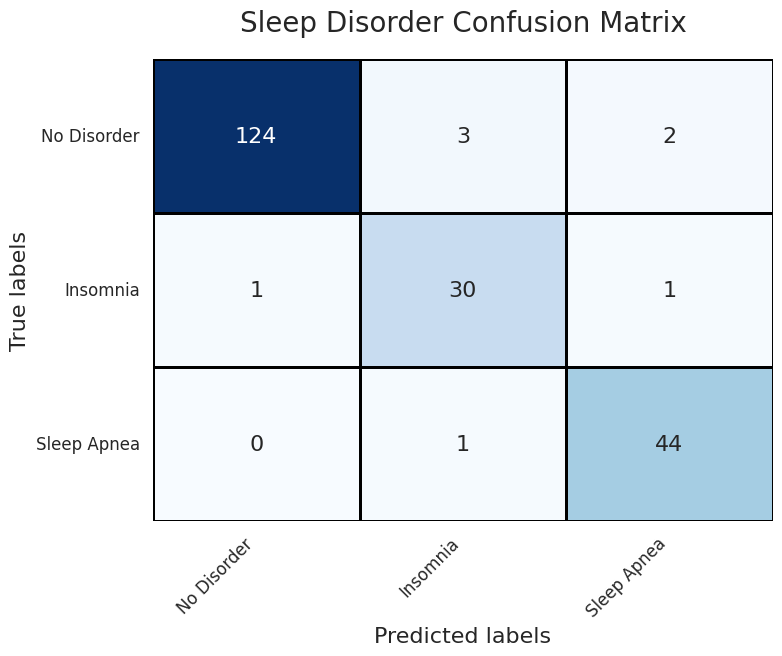

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = pd.DataFrame(y_pred, columns=['Stress Level', 'Sleep Disorder'])
y_pred = y_pred.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)


def classify_predictions(predictions):
    """
    Classifies the predictions into stress levels and sleep disorders based on provided logic.

    Args:
    predictions (list of lists): List of prediction values for each instance

    Returns:
    stress_levels (list): Classified stress levels ('Low' or 'High')
    sleep_disorders (list): Classified sleep disorders ('No Disorder', 'Insomnia', 'Sleep Apnea')
    """
    stress_levels = []
    sleep_disorders = []

    for _, pred in predictions.iterrows():
        # Classify stress level
        stress_level = 'Low' if pred['Stress Level'] < 5 else 'High'
        stress_levels.append(stress_level)

        # Classify sleep disorder
        if pred['Sleep Disorder'] == 0:
            sleep_disorder = 'No Disorder'
        elif pred['Sleep Disorder'] == 1:
            sleep_disorder = 'Insomnia'
        elif pred['Sleep Disorder'] == 2:
            sleep_disorder = 'Sleep Apnea'

        sleep_disorders.append(sleep_disorder)

    return stress_levels, sleep_disorders

def plot_confusion_matrix(y_true, y_pred, labels, title):
    """
    Plots an advanced confusion matrix using seaborn heatmap with annotations.

    Args:
    y_true (array): True labels
    y_pred (array): Predicted labels
    labels (list): List of class names
    title (str): Title of the plot
    """

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)

    # Customize the color map and display format
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                     annot_kws={"size": 16}, linewidths=2, linecolor='black')

    # Set titles and labels
    ax.set_title(title, fontsize=20, pad=20)
    ax.set_xlabel('Predicted labels', fontsize=16)
    ax.set_ylabel('True labels', fontsize=16)

    # Set the tick labels
    ax.xaxis.set_ticklabels(labels, rotation=45, ha='right', fontsize=12)
    ax.yaxis.set_ticklabels(labels, rotation=0, fontsize=12)

    # Display the plot
    plt.show()


# Classify predictions
y_val_stress, y_val_sleep = classify_predictions(y_val)
y_pred_stress, y_pred_sleep = classify_predictions(y_pred)

# Plot confusion matrix for Stress Level
labels_stress = ['Low', 'High']
plot_confusion_matrix(y_val_stress, y_pred_stress, labels_stress, 'Stress Level Confusion Matrix')

# Plot confusion matrix for Sleep Disorder
labels_sleep = ['No Disorder', 'Insomnia', 'Sleep Apnea']
plot_confusion_matrix(y_val_sleep, y_pred_sleep, labels_sleep, 'Sleep Disorder Confusion Matrix')


PREDICTION OF TEST DATASET

In [127]:
# Predict the stress level and sleep disorder on the test data
y_pred_test = best_multi_output_svm.predict(X_test)

# Print the third row of the test data
print("Third row of the test data:")
print(X_test[2])

# Print the actual y test values for the third row
print("\nActual y test values for the third row:")
print(y_test.iloc[2])

# Print the predicted values for the third row
print("\nPredicted values for the third row:")
print(y_pred_test[2])


Third row of the test data:
[-1.0073108   1.69343472  0.42946752  1.25679698  1.36657247  0.77077697
  1.06839609 -0.55669544  0.31794357  1.54332714  1.75336421]

Actual y test values for the third row:
Stress Level      0
Sleep Disorder    2
Name: 348, dtype: int64

Predicted values for the third row:
[0 2]


FUNCTION FOR PREDICTING INPUT DATA

In [139]:
import numpy as np

def predict_stress_and_sleep_disorder(input_data):
    """
    This function takes in a list of input values and predicts the stress level and sleep disorder.

    Args:
        input_data: A list containing the following values:
          - Gender
          - Age
          - Occupation
          - Sleep Duration
          - Quality of Sleep
          - Physical Activity Level
          - BMI Category
          - Heart Rate
          - Daily Steps
          - SystolicBP
          - DiastolicBP

    Returns:
        A list containing the predicted stress level and sleep disorder.
    """

    # Define the mapping for categorical values
    gender_map = {'Female': 0, 'Male': 1}
    occupation_map = {'Accountant': 1, 'Doctor': 2, 'Engineer': 3, 'Lawyer': 4,
                      'Manager': 5, 'Nurse': 6, 'Salesperson': 7,
                      'Sales Representative': 8, 'Scientist': 9,
                      'Software Engineer': 10, 'Teacher': 11}
    bmi_map = {'Underweight': 0, 'Normal Weight': 1, 'Normal': 1,
               'Overweight': 2, 'Obese': 3}

    # Convert input data into a NumPy array for processing
    processed_data = []

    for row in input_data:
        # Map categorical values to numerical values
        processed_row = row.copy()
        processed_row[0] = gender_map[processed_row[0]]  # Gender
        processed_row[2] = occupation_map[processed_row[2]]  # Occupation
        processed_row[6] = bmi_map[processed_row[6]]  # BMI Category

        # Append the processed row to the new list
        processed_data.append(processed_row)

    # Convert the processed data to a NumPy array
    input_data_as_numpy_array = np.asarray(processed_data)

    # Standardize the input data
    std_data = scaler.transform(input_data_as_numpy_array)

    # Predict using the model (ONNX or any other model)
    predictions = best_multi_output_svm.predict(std_data)

    results = []
    for i in range(len(predictions)):
        stress_level = 'Low' if predictions[i][0] < 5 else 'High'
        sleep_disorder = 'No Disorder' if predictions[i][1] == 0 else 'Insomnia' if predictions[i][1] == 1 else 'Sleep Apnea'
        results.append((stress_level, sleep_disorder))

    return results


# Example usage for prediction
input_data = [['Male', 1, 'Sales Representative', 5.9, 0, 0, 'Obese', 17, 0, 140, 90],
              ['Female', 1, 'Teacher', 2.9, 0, 3, 'Normal Weight', 17, 0, 140, 90]]

predictions = predict_stress_and_sleep_disorder(input_data)

# Print results
for (stress_level, sleep_disorder) in predictions:
    print("Predicted Stress Level:", stress_level)
    print("Predicted Sleep Disorder:", sleep_disorder)


Predicted Stress Level: High
Predicted Sleep Disorder: Sleep Apnea
Predicted Stress Level: High
Predicted Sleep Disorder: Insomnia


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SAVING THE MODEL ON ONNX

In [128]:
pip install onnx onnxmltools skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.16.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobu

In [129]:
from sklearn import svm
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Assuming `best_multi_output_svm` is your trained model
# Define the input shape for the model
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]

# Convert the trained model to ONNX format
onnx_model = convert_sklearn(best_multi_output_svm, initial_types=initial_type)

# Save the ONNX model to a file
with open("multi_output_svm_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


/usr/local/lib/python3.10/dist-packages/skl2onnx/_parse.py:563: UserWarning: Option zipmap is ignored for model <class 'sklearn.multioutput.MultiOutputClassifier'>. Set option zipmap to False to remove this message.
  warnings.warn(


For loading the saved model in a new environment

In [ ]:
#pip install onnxruntime

import numpy as np
import onnxruntime as ort

# Load the ONNX model
onnx_model_path = "multi_output_svm_model.onnx"
onnx_session = ort.InferenceSession(onnx_model_path)

def predict_stress_and_sleep_disorder(input_data):
    """
    This function takes in a list of input values and predicts the stress level and sleep disorder.

    Args:
        input_data: A list containing the following values:
          - Gender
          - Age
          - Occupation
          - Sleep Duration
          - Quality of Sleep
          - Physical Activity Level
          - BMI Category
          - Heart Rate
          - Daily Steps
          - SystolicBP
          - DiastolicBP

    Returns:
        A list containing the predicted stress level and sleep disorder.
    """

    # Convert the input values to their corresponding numerical values
    rows = len(input_data)
    results = []

    gender_map = {'Female': 0, 'Male': 1}
    occupation_map = {'Accountant': 1, 'Doctor': 2, 'Engineer': 3, 'Lawyer': 4,
                      'Manager': 5, 'Nurse': 6, 'Salesperson': 7,
                      'Sales Representative': 8, 'Scientist': 9,
                      'Software Engineer': 10, 'Teacher': 11}
    bmi_map = {'Underweight': 0, 'Normal Weight': 1, 'Normal': 1,
               'Overweight': 2, 'Obese': 3}

    for i in range(rows):
        # Map categorical values to numerical
        input_data[i][0] = gender_map[input_data[i][0]]
        input_data[i][2] = occupation_map[input_data[i][2]]
        input_data[i][6] = bmi_map[input_data[i][6]]

    # Convert the input data to a NumPy array
    input_data_as_numpy_array = np.asarray(input_data)

    # Standardize the input data (assuming 'scaler' is defined and fitted)
    std_data = scaler.transform(input_data_as_numpy_array)

    # Prepare input for ONNX model
    onnx_input = {onnx_session.get_inputs()[0].name: std_data.astype(np.float32)}

    # Predict using the ONNX model
    prediction = onnx_session.run(None, onnx_input)

    # Process predictions
    for i in range(rows):
        stress_level = 'Low' if prediction[0][i] < 5 else 'High'
        sleep_disorder = 'No Disorder' if prediction[1][i] == 0 else 'Insomnia' if prediction[1][i] == 1 else 'Sleep Apnea'
        results.append((stress_level, sleep_disorder))

    return results
